### Steps
#### Load Data -->  Pickele file(optional)
#### Balance Data -->  SMOTE
#### Dimentionality Reduciton -->  PCA
#### Model Training -->  Comparision

### Import Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB       # For continuous data
from sklearn.svm import SVC  # Support Vector Regressor


### Load Data

In [4]:
original_csv_path_x = 'samples/data.csv'
original_csv_path_y = 'samples/labels.csv'

In [10]:
## serialization & deserialization for faster loading

data_x = pd.read_csv(original_csv_path_x)

In [11]:
data_x = data_x.drop(data_x.columns[0],axis=1)

In [12]:
data_x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [13]:
data_x.to_pickle('x_feat.pkl')

In [14]:
data_y = pd.read_csv(original_csv_path_y)

In [17]:
data_y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [16]:
data_y = data_y.drop(data_y.columns[0],axis=1)

In [18]:
data_y.to_pickle('y_feat.pkl')

### Balacing the data

In [153]:
x = pd.read_pickle('x_feat.pkl')
y = pd.read_pickle('y_feat.pkl')

In [154]:
freq = y.value_counts()
# print(freq.index)
labels = []

for e in freq.index:
    print(e[0])
    labels.append(e[0])

BRCA
KIRC
LUAD
PRAD
COAD


In [155]:
freq.values

array([300, 146, 141, 136,  78])

/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_33964/1897865952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


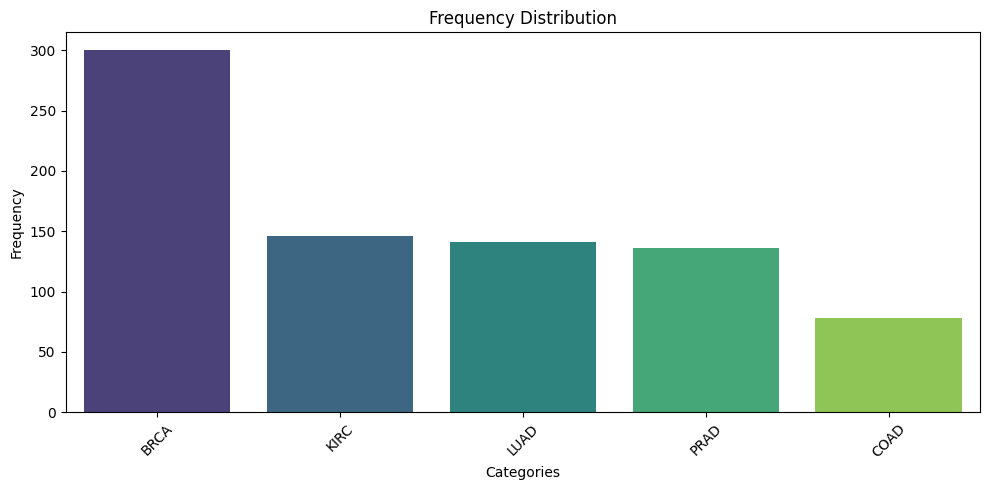

In [156]:
# Convert the index and values of `freq` into separate variables
counts = freq.values

# Plot using Seaborn
plt.figure(figsize=(10, 5))  # Set the figure size
sns.barplot(x=labels, y=counts, palette="viridis")

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

### There is imbalance in the data

In [157]:
Counter(y.iloc[:,0])

Counter({'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78})

In [158]:
from imblearn.over_sampling import SMOTE
# Check original class distribution
print("Original class distribution:", Counter(y.iloc[:,0]))

# Apply SMOTE
smote = SMOTE(sampling_strategy = 'not majority',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution


Original class distribution: Counter({'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78})


In [159]:
print("Resampled class distribution:", Counter(y_resampled.iloc[:,0]))


Resampled class distribution: Counter({'PRAD': 300, 'LUAD': 300, 'BRCA': 300, 'KIRC': 300, 'COAD': 300})


### Dimentionality Reduction

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Standardize the dataset


In [161]:
pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")


Original shape: (1500, 20531)
Reduced shape: (1500, 8)


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [163]:
y_data = le.fit_transform(y_resampled)

/Users/abirbera/Developer/college/projects/Major_Project/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model training

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_data,test_size=.35,random_state=100)

In [146]:
print(f'Shape of x_train : {x_train.shape}\nShape of y_train : {y_train.shape}\nShape of x_test : {x_test.shape}\nShape of y_val : {y_test.shape}')

Shape of x_train : (975, 6)
Shape of y_train : (975,)
Shape of x_test : (525, 6)
Shape of y_val : (525,)


In [92]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train,y_train)

/Users/abirbera/Developer/college/projects/Major_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
y_pred = model_lgr.predict(x_test)

In [94]:
y_test[:10]

array([2, 2, 2, 1, 0, 0, 0, 4, 0, 1])

In [95]:
y_pred[:10]

array([2, 2, 2, 1, 0, 0, 0, 4, 0, 1])

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
acc = accuracy_score(y_test, y_pred)

In [98]:
acc

0.9980952380952381

In [99]:
model_dtree = DecisionTreeClassifier(max_depth=5)
model_dtree.fit(x_train, y_train)
y_pred = model_dtree.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred)

0.9523809523809523

In [104]:
from sklearn.model_selection import GridSearchCV

In [176]:
accuracy_list = []

In [201]:
def model_performace(name,model, params,x_train,y_train,x_test,y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(x_train,y_train)
    y_pred = grid_search.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

In [122]:
### Model List
lgr = LogisticRegression()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
gb = GradientBoostingClassifier()
svm = SVC()
nb = GaussianNB()

In [120]:
## params for LR
param_grid_lr = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2'],
}

In [111]:
## params for RF
param_grid_rf ={
    'criterion':["gini","entropy"],
    "max_depth":[1,3,5,8,],
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [ ]:
## Params for AB
param_grid_AB = {
    'n_estimators':[1,20,50,100],
    'learning_rate':[0.001,0.01,0.1,1.0]
}

In [ ]:
## params for GB
param_grid_GB = {
    'loss':['log_loss','exponential'],
    'n_estimators': [10,50,100],
    'learning_rate':[0.01,0.1,1]
}

In [172]:
## params for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'shrinking': [True, False],  # Whether to use shrinking heuristic
    'class_weight': [None, 'balanced'],  # Handling imbalanced classes
}

In [125]:
## params for NB
param_grid_nb = {
}

In [ ]:
param_grid_XGB = { 
    'n_estimators': [20, 50,100],           
    'learning_rate': [0.01, 0.1, 0.2],           
    'max_depth': [3, 6, 10],                      
    'eval_metric':['mlogloss','logloss']}

In [119]:
param_grid_lgb = {
'num_leaves' : [50,70,100],
'objective':['multiclass','multiclassova'],
'max_depth': [3, 6, 8],                
}

In [ ]:
models = [
    { 'name': 'LR',
        'model': lgr,
        'params' : param_grid_lr
    },
    { 'name': 'RF',
        'model': rf,
        'params' : param_grid_rf
    },
    { 'name': 'GB',
        'model': gb,
        'params' : param_grid_GB
    },
    { 'name': 'XGB',
        'model': xgb,
        'params' : param_grid_XGB
    },
    { 'name': 'AB',
        'model': adb,
        'params' : param_grid_AB
    },
    { 'name': 'LGBM',
        'model': lgb,
        'params' : param_grid_lgb
    },
]

In [165]:
print(f'Shape of x_train : {x_train.shape}\nShape of y_train : {y_train.shape}\nShape of x_test : {x_test.shape}\nShape of y_val : {y_test.shape}')

Shape of x_train : (1125, 8)
Shape of y_train : (1125,)
Shape of x_test : (375, 8)
Shape of y_val : (375,)


In [199]:
test_sizes = [0.1,0.25,0.33,0.4,0.50]

In [ ]:
result = []
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(X_pca, y_data,test_size= test_size,random_state=42)
    x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train,test_size= 0.10,random_state=42)
    test_accuracy_list = []
    train_accuracy_list = []
    for model in models:
        print('-' * 200)
        test_acc = model_performace(name=model['name'],model=model['model'],params=model['params'],x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
        train_acc = model_performace(name=model['name'],model=model['model'],params=model['params'],x_train=x_train,x_test=x_val,y_train=y_train,y_test=y_val)
        test_accuracy_list.append({
            model['name'] : test_acc
        })
        train_accuracy_list.append({
            model['name'] : train_acc
        })
    result.append({
        'test_size':test_size,
        'train_accuracy': train_accuracy_list,
        'test_accuracy' : test_accuracy_list
    })

In [204]:
result

[{'test_size': 0.1,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.8962962962962963},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.9333333333333333},
   {'LGBM': 1.0}]},
 {'test_size': 0.25,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.8938053097345132},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 1.0},
   {'RF': 0.9973333333333333},
   {'GB': 0.9946666666666667},
   {'XGB': 0.9973333333333333},
   {'AB': 0.9253333333333333},
   {'LGBM': 1.0}]},
 {'test_size': 0.33,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.9108910891089109},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 0.9939393939393939},
   {'RF': 0.9919191919191919},
   {'GB': 0.9878787878787879},
   {'XGB': 0.9878787878787879},
   {'AB': 0.9151515151515152},
   {'LGBM': 0.9878787878787879}]},
 {'test_size': 0.4,
